In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
100% 1.25G/1.25G [01:06<00:00, 8.44MB/s]
100% 1.25G/1.25G [01:06<00:00, 20.2MB/s]


##### Unzip the file

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/plant-disease-recognition-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Train/Train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256,256),
    shuffle=True
)

test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Test/Test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256,256),
    shuffle=True
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Validation/Validation',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256,256),
    shuffle=True
)

Found 1322 files belonging to 3 classes.
Found 150 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


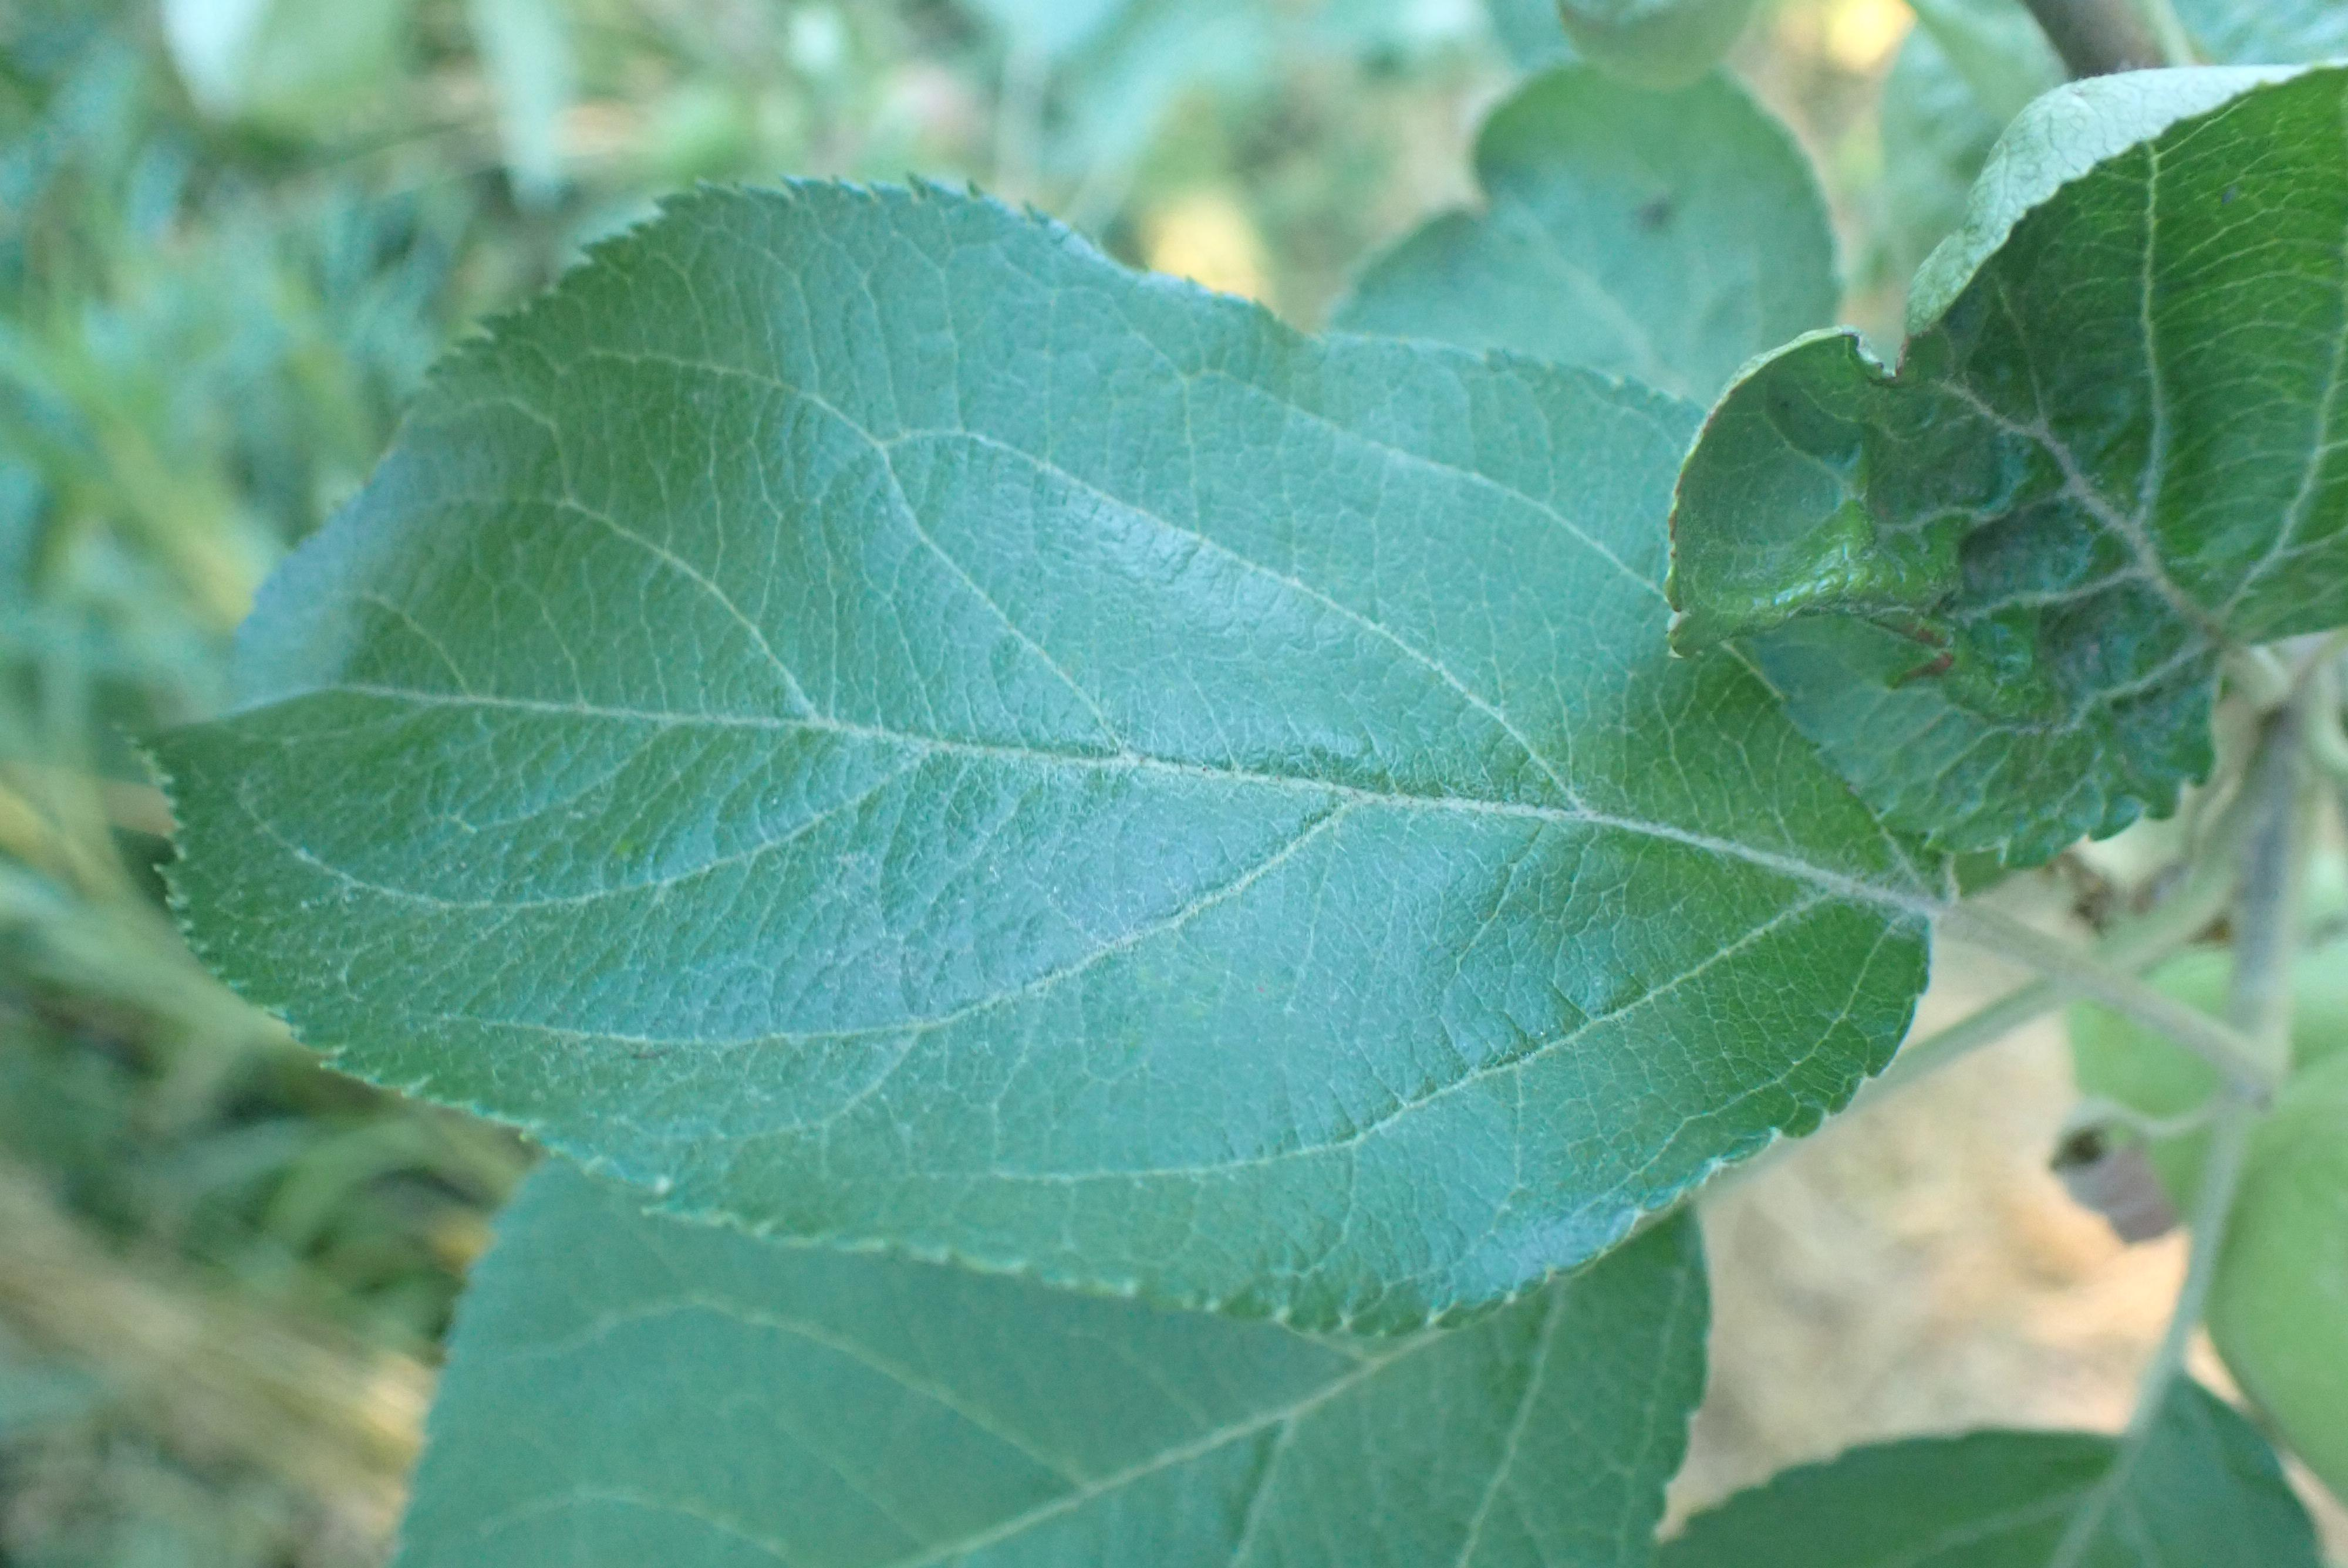

In [ ]:
from PIL import Image
import IPython.display as display

image_path = '/content/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

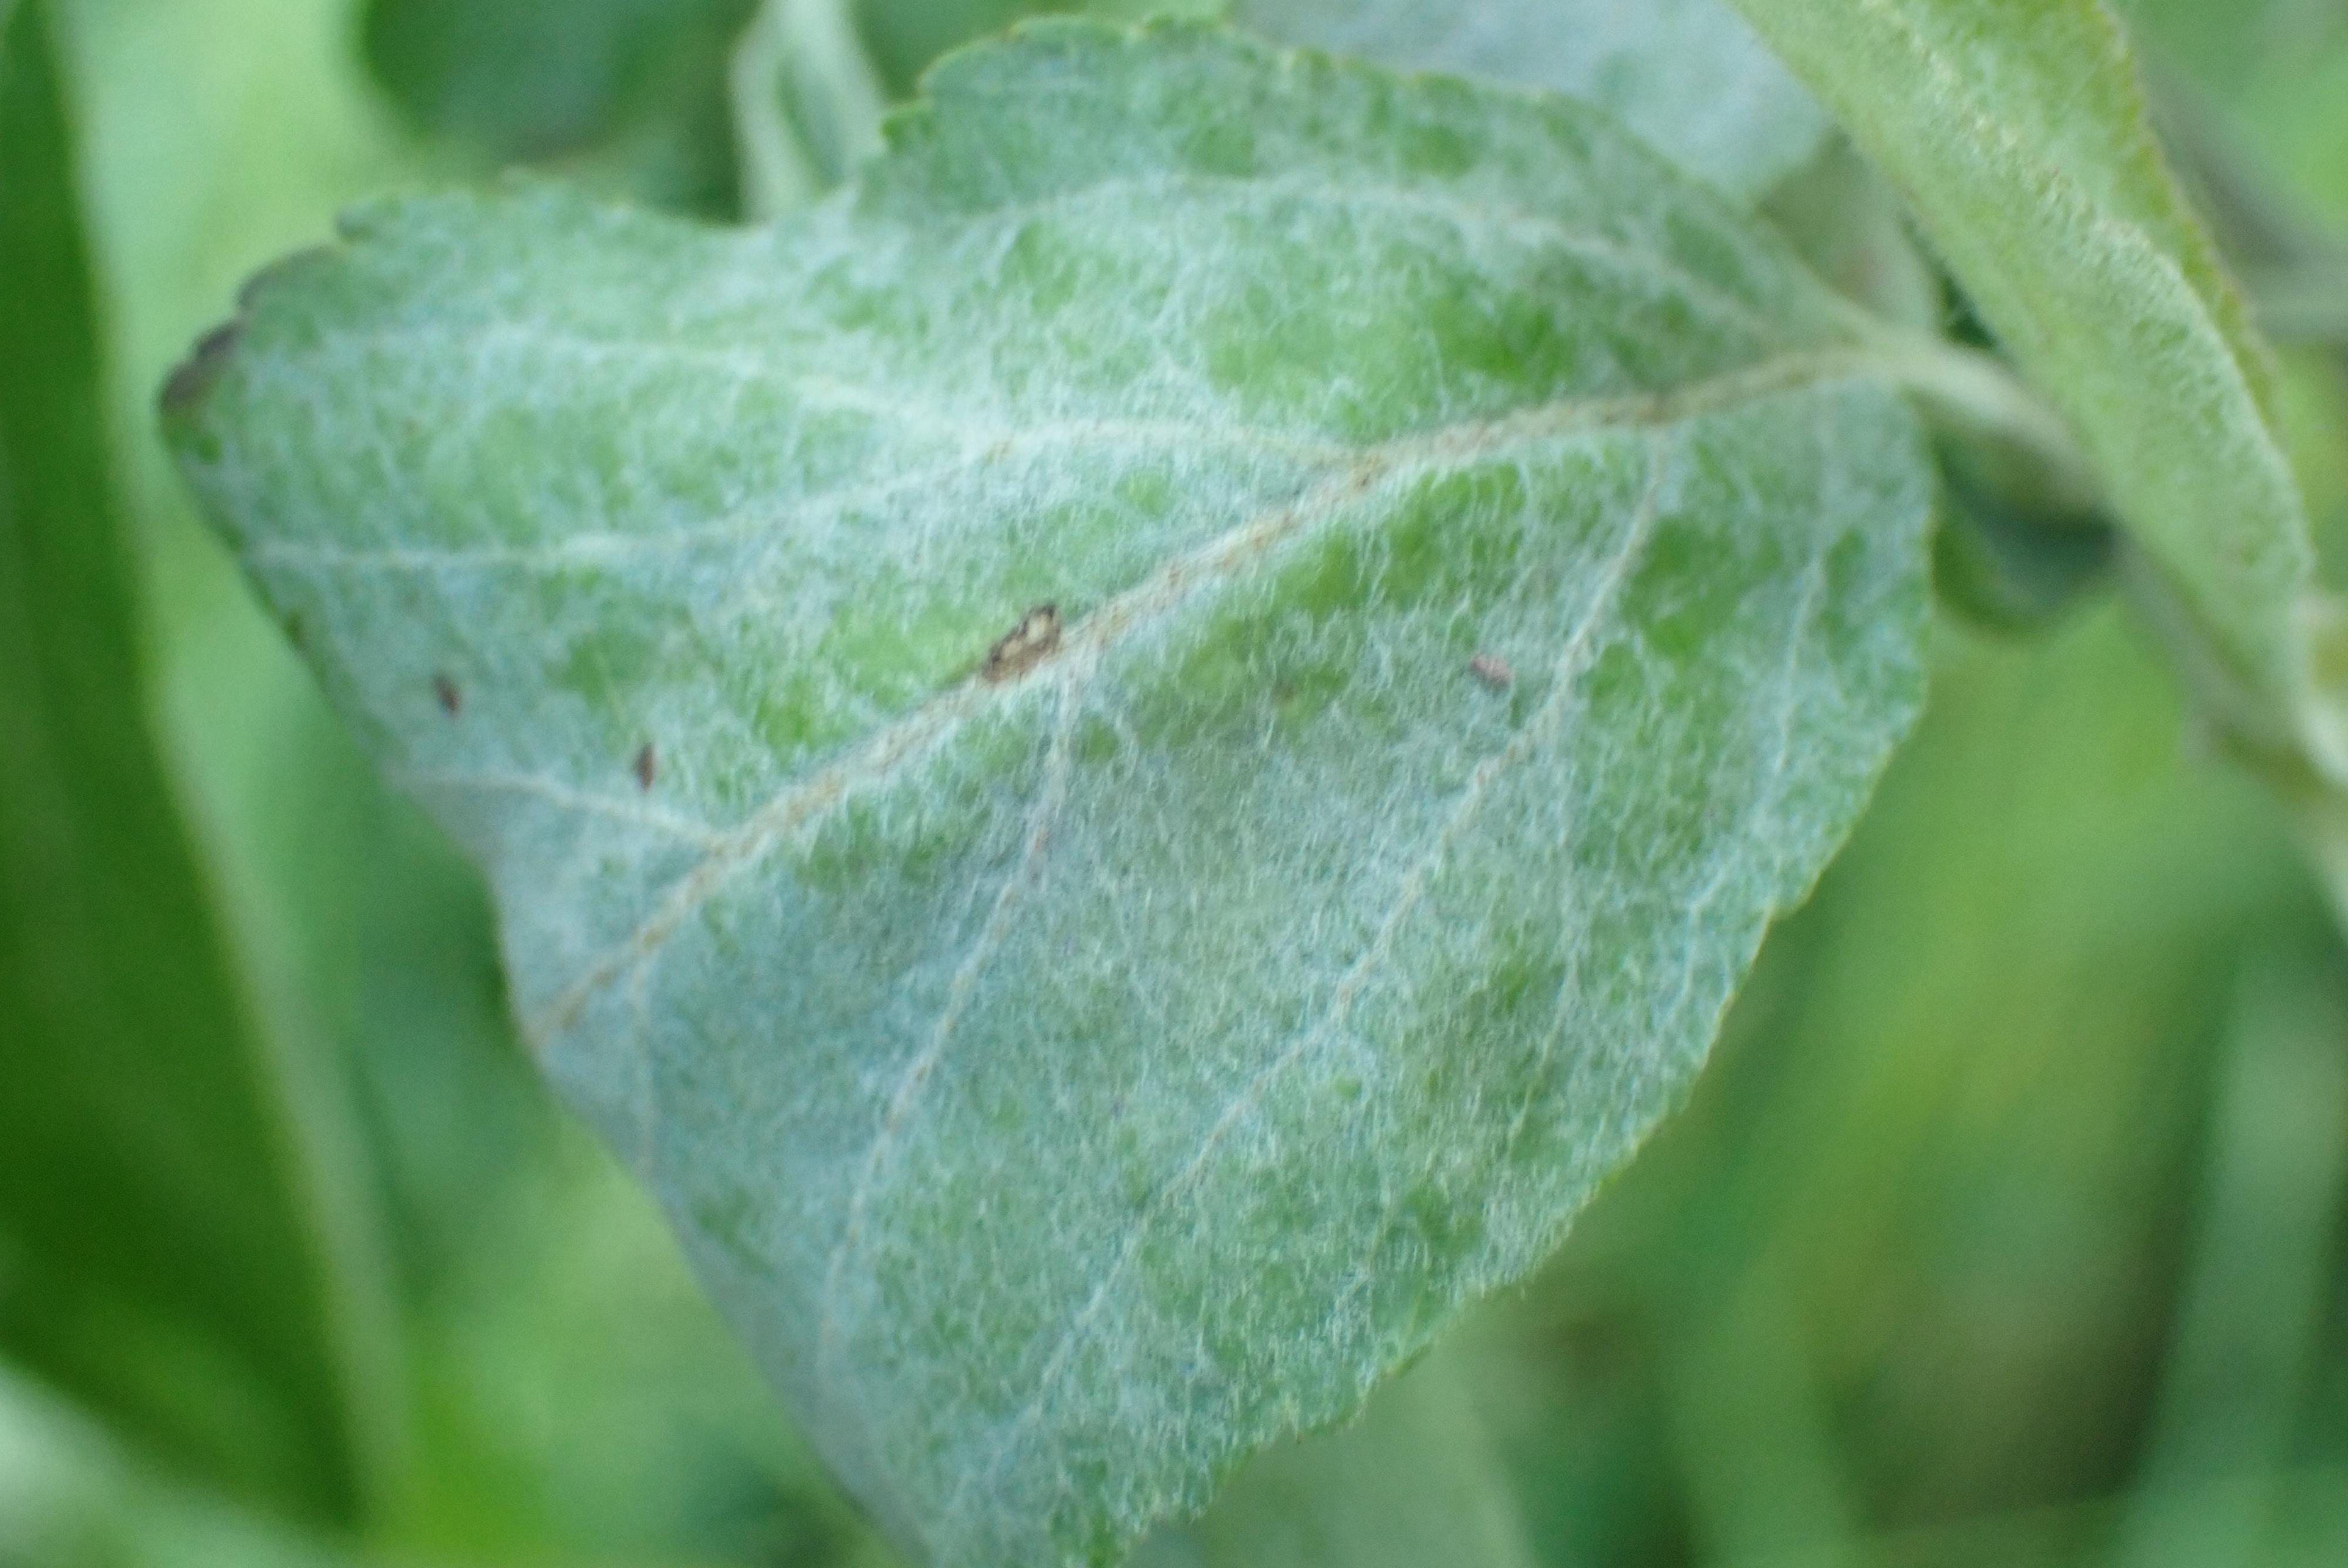

In [ ]:
from PIL import Image
import IPython.display as display

image_path = '/content/Test/Test/Powdery/80bc7d353e163e85.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

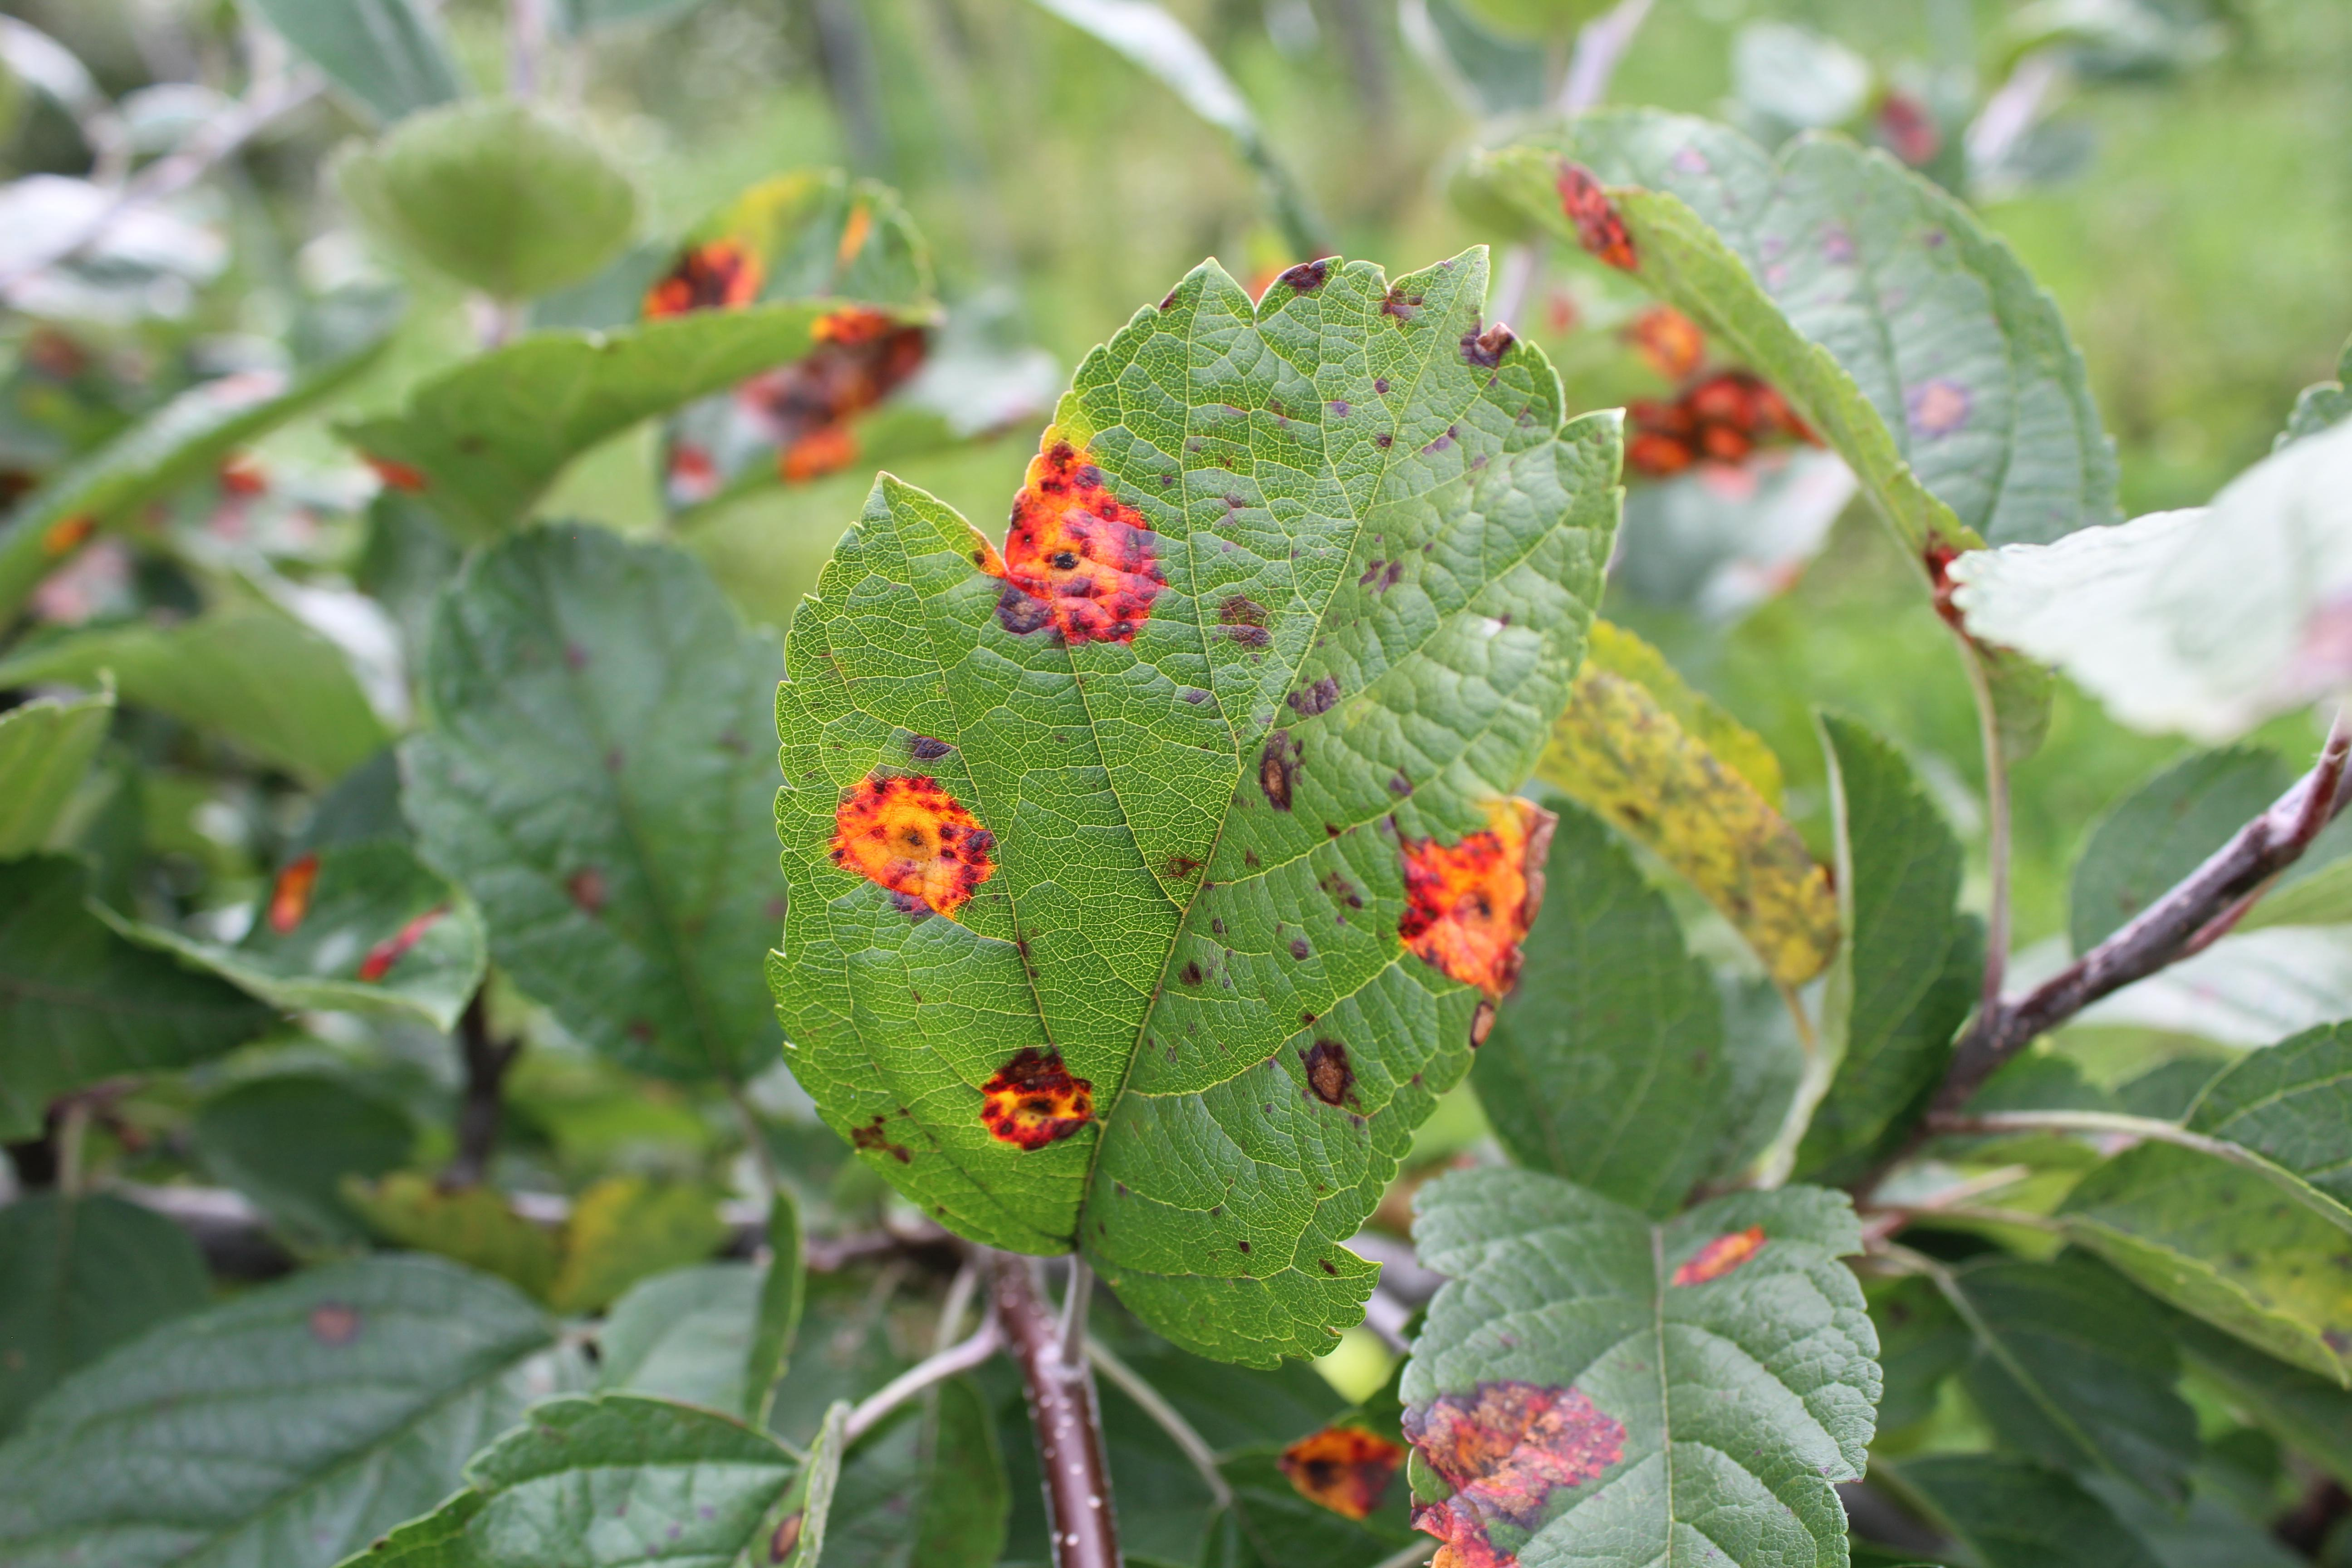

In [ ]:
from PIL import Image
import IPython.display as display

image_path = '/content/Test/Test/Rust/82add70df6ab2854.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [ ]:
# Preprocessing the image:

def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

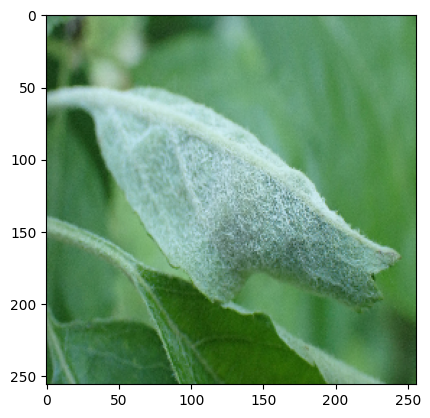

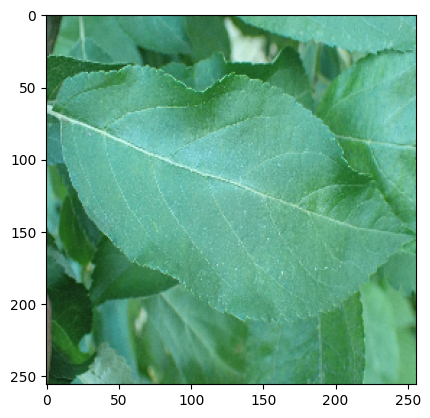

In [ ]:
# Display one image from the training dataset
for image, label in train_ds.take(1):
  plt.imshow(image[0])
  plt.show()
  plt.imshow(image[10])
  plt.show()

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,batch_size=16,epochs=10,validation_data=validation_ds,validation_batch_size=16)

Epoch 1/10
42/42 [==============================] - 55s 876ms/step - loss: 2.0583 - accuracy: 0.4977 - val_loss: 0.6612 - val_accuracy: 0.7000
Epoch 2/10
42/42 [==============================] - 49s 941ms/step - loss: 0.4784 - accuracy: 0.8086 - val_loss: 0.9344 - val_accuracy: 0.6667
Epoch 3/10
42/42 [==============================] - 55s 1s/step - loss: 0.2682 - accuracy: 0.9024 - val_loss: 0.4423 - val_accuracy: 0.8000
Epoch 4/10
42/42 [==============================] - 55s 1s/step - loss: 0.1822 - accuracy: 0.9372 - val_loss: 0.5528 - val_accuracy: 0.8667
Epoch 5/10
42/42 [==============================] - 63s 1s/step - loss: 0.0997 - accuracy: 0.9697 - val_loss: 0.4677 - val_accuracy: 0.8500
Epoch 6/10
42/42 [==============================] - 47s 931ms/step - loss: 0.0525 - accuracy: 0.9856 - val_loss: 0.4604 - val_accuracy: 0.8667
Epoch 7/10
42/42 [==============================] - 49s 963ms/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 0.7182 - val_accuracy: 0.8167
Epoch 8/

In [ ]:
model.save('/content/Healthy_powdert_rusty.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Testing on test data

In [ ]:
# Preprocessing the image:

def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

test_ds=test_ds.map(process)

img=test_ds.take(1000)

In [ ]:
# def preprocess_image(image_path, target_size=(225, 225)):
#     img = tf.cast(image/255. ,tf.float32)
#     return img

# x = preprocess_image('/content/Test/Test/Healthy/8ddd5ec1c0de38c4.jpg')

In [ ]:
predictions=model.predict(img)
predictions[0]

5/5 [==============================] - 5s 129ms/step


array([5.451946e-11, 9.937394e-11, 1.000000e+00], dtype=float32)

In [ ]:
labels = ['Healthy', 'Powdery', 'Rust']


predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
